**Submitted by : Akshay Bajpai**

**subject : Deep Learning & Intelligent Systems**

**Study group: KNSSh-11f**

**Institute: ICNI**

In [214]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [215]:
file_path = 'TheSocialDilemma.csv'
data = pd.read_csv(file_path)
data = data[['text', 'Sentiment']]
data.head()

,text,Sentiment
0,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral
1,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral
2,Go watch “The Social Dilemma” on Netflix!\n\nI...,Positive
3,I watched #TheSocialDilemma last night. I’m sc...,Negative
4,The problem of me being on my phone most the t...,Positive


In [216]:


X = data['text']
y = data['Sentiment'].map({'Negative':0, 'Neutral':1, 'Positive':2})

train_size = int(len(data)*0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print ('Length of text: {} characters'.format(len(X_train)))

print("Max tweet length:", X.map(len).max())
print("Min tweet length:", X.map(len).min())
print("Average tweet length:", X.map(len).mean())

X_train shape: (14601,)
y_train shape: (14601,)
X_test shape: (3651,)
y_test shape: (3651,)
Length of text: 14601 characters
Max tweet length: 152
Min tweet length: 22
Average tweet length: 113.8436335744028


In [217]:
vocab_size = 8000
embedding_dim = 32
max_length = 90
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='pre', truncating='pre')
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='pre', truncating='pre')
print("Shape of train_padded:", train_padded.shape)
print("Shape of test_padded:", test_padded.shape)

training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)


Shape of train_padded: (14601, 90)
Shape of test_padded: (3651, 90)


In [249]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_padded, y_train, epochs=10,
                         batch_size=60, validation_split=0.2)

Epoch 1/10
195/195 [==============================] - 6s 25ms/step - loss: -2.6352 - acc: 0.3505 - val_loss: -4.0471 - val_acc: 0.3338
Epoch 2/10
195/195 [==============================] - 4s 22ms/step - loss: -4.6783 - acc: 0.3503 - val_loss: -5.8983 - val_acc: 0.3338
Epoch 3/10
195/195 [==============================] - 4s 22ms/step - loss: -6.4521 - acc: 0.3503 - val_loss: -7.7707 - val_acc: 0.3338
Epoch 4/10
195/195 [==============================] - 4s 22ms/step - loss: -8.2081 - acc: 0.3503 - val_loss: -9.6348 - val_acc: 0.3338
Epoch 5/10
195/195 [==============================] - 4s 23ms/step - loss: -10.2806 - acc: 0.3539 - val_loss: -11.3721 - val_acc: 0.3245
Epoch 6/10
195/195 [==============================] - 4s 22ms/step - loss: -12.9662 - acc: 0.3628 - val_loss: -14.2414 - val_acc: 0.3461
Epoch 7/10
195/195 [==============================] - 4s 23ms/step - loss: -15.5762 - acc: 0.3762 - val_loss: -16.8874 - val_acc: 0.3591
Epoch 8/10
195/195 [=============================

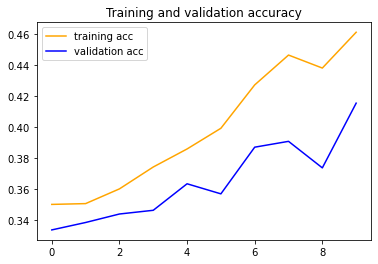

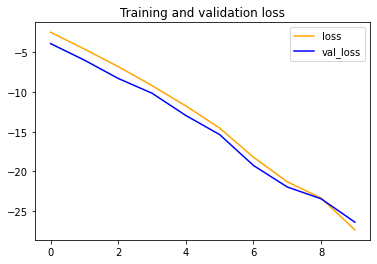

In [248]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='val_loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [218]:
model = Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                    tf.keras.layers.LSTM(100),
                    tf.keras.layers.Dense(max_length/2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    tf.keras.layers.Dropout(0.4),
                    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.01,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True
)


Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_43 (Embedding)    (None, 90, 32)            256000    
                                                                 
 lstm_56 (LSTM)              (None, 100)               53200     
                                                                 
 dense_86 (Dense)            (None, 45)                4545      
                                                                 
 dropout_37 (Dropout)        (None, 45)                0         
                                                                 
 dense_87 (Dense)            (None, 3)                 138       
                                                                 
Total params: 313,883
Trainable params: 313,883
Non-trainable params: 0
_________________________________________________________________


In [219]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [220]:
history = model.fit(train_padded, y_train, epochs=10,  validation_data=(test_padded, y_test), validation_steps=30)

Epoch 1/10
457/457 [==============================] - 15s 30ms/step - loss: 0.6308 - accuracy: 0.7684 - val_loss: 0.3882 - val_accuracy: 0.8622
Epoch 2/10
457/457 [==============================] - 13s 29ms/step - loss: 0.2703 - accuracy: 0.9241 - val_loss: 0.2801 - val_accuracy: 0.9293
Epoch 3/10
457/457 [==============================] - 13s 28ms/step - loss: 0.1977 - accuracy: 0.9504 - val_loss: 0.3340 - val_accuracy: 0.9206
Epoch 4/10
457/457 [==============================] - 13s 28ms/step - loss: 0.1570 - accuracy: 0.9637 - val_loss: 0.3015 - val_accuracy: 0.9285
Epoch 5/10
457/457 [==============================] - 14s 30ms/step - loss: 0.1343 - accuracy: 0.9687 - val_loss: 0.3530 - val_accuracy: 0.9250
Epoch 6/10
457/457 [==============================] - 14s 30ms/step - loss: 0.1146 - accuracy: 0.9743 - val_loss: 0.4006 - val_accuracy: 0.9280
Epoch 7/10
457/457 [==============================] - 14s 30ms/step - loss: 0.0991 - accuracy: 0.9775 - val_loss: 0.5093 - val_accuracy:

In [221]:

def get_encode(x):
  #x = clean_text(x)
  x = tokenizer.texts_to_sequences(x)
  x = tf.keras.preprocessing.sequence.pad_sequences(x, maxlen=max_length, padding='pre', truncating='pre')
  return x

test_comment = ['This movie depicted the current society issues so well, I loved it so much']

seq = tokenizer.texts_to_sequences(test_comment)
padded = pad_sequences(seq, maxlen=max_length, padding='pre', truncating='pre')
print(padded.shape)
y_pred = model.predict(padded).round()
print(y_pred)

(1, 90)
[[0. 0. 1.]]


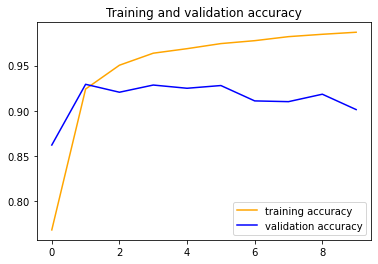

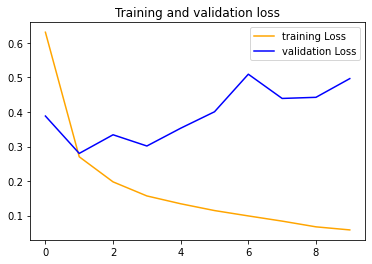

In [222]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '-', color='orange', label='training accuracy')
plt.plot(epochs, val_accuracy, '-', color='blue', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training Loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()